In [36]:
import numpy as np
import datetime
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import random
import math, warnings
import statistics 
from collections import defaultdict
%matplotlib inline
sns.set(style="darkgrid")


df_weather = pd.read_csv("/Users/alperoner/Desktop/workspace/arctic/data/ForecastData/ArcticIceWeather.csv", sep=",", index_col=False, usecols=['Date','Location', 'City', 'Cloud', 'Temperature','Humidity','UV','Wind','Pressure','Visibility'], encoding = "utf-8")
df_weather

/Users/alperoner/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Date      Location  \
0        2017-11-15 15:58:57.087000000      İstanbul   
1        2017-11-15 15:59:21.637000000      Ümraniye   
2        2017-11-15 16:00:12.967000000        Pendik   
3        2017-11-15 16:00:50.390000000      Bağcılar   
4        2017-11-15 16:01:18.700000000  Bahçelievler   
...                                ...           ...   
4471435  2019-03-28 08:30:06.417000000        Ovacik   
4471436  2019-03-28 08:30:12.093000000        Pertek   
4471437  2019-03-28 08:30:16.237000000         Girne   
4471438  2019-03-28 08:30:19.217000000    Gazimağusa   
4471439  2019-03-28 08:30:21.147000000       Lefkoşa   

                                   City  Temperature               Cloud  \
0                              İstanbul           14  Çoğunlukla Bulutlu   
1                              İstanbul           16                Orta   
2                              İstanbul           17                Orta   
3                              İstanbul           16     Parçalı Bulutlu   
4                              İstanbul           17     Parçalı Bulutlu   
...                                 ...          ...                 ...   
4471435                         Tunceli            3     Parçalı Bulutlu   
4471436                         Tunceli            4             Bulutlu   
4471437   Kuzey Kıbrıs Türk Cumhuriyeti           14     Parçalı Bulutlu   
4471438   Kuzey Kıbrıs Türk Cumhuriyeti           15     Parçalı Bulutlu   
4471439                       Yeşil Hat           13     Parçalı Bulutlu   

         Humidity        Wind     Pressure      UV          Visibility  
0              98           0   KKD 8 km/s  1022.4  16.100000000000001  
1              84           1  KKD 31 km/s  1021.0  9.6999999999999993  
2              75           1  KKD 31 km/s  1021.0  9.6999999999999993  
3              80           0  KKD 29 km/s  1022.0  9.6999999999999993  
4              76           0  KKD 29 km/s  1022.0  9.6999999999999993  
...           ...         ...          ...     ...                 ...  
4471435         1  BKB 8 km/s        1.019     6.0                 145  
4471436         1  BGB 5 km/s        1.019     6.0                 129  
4471437         1   B 10 km/s        1.018     0.0                  97  
4471438         1  GGB 6 km/s        1.018     6.0                 145  
4471439         1   B 10 km/s        1.018     0.0                  97  

[4471440 rows x 10 columns]

In [37]:
df_weather_uskudar = df_weather.loc[df_weather['Location'] == 'Üsküdar']
df_weather_uskudar

Date Location       City  Temperature  \
5        2017-11-15 16:01:56.037000000  Üsküdar   İstanbul           16   
234      2017-11-15 17:39:45.457000000  Üsküdar   İstanbul           15   
262      2017-11-15 17:41:38.307000000  Üsküdar   İstanbul           15   
496      2017-11-16 12:28:48.137000000  Üsküdar   İstanbul           15   
847      2017-11-16 14:43:00.090000000  Üsküdar   İstanbul           14   
...                                ...      ...        ...          ...   
4469335  2019-03-28 04:00:33.470000000  Üsküdar   İstanbul            7   
4469757  2019-03-28 05:00:30.293000000  Üsküdar   İstanbul            7   
4470179  2019-03-28 06:00:25.220000000  Üsküdar   İstanbul            7   
4470601  2019-03-28 07:00:30.727000000  Üsküdar   İstanbul            7   
4471023  2019-03-28 08:00:37.223000000  Üsküdar   İstanbul            7   

                      Cloud  Humidity         Wind     Pressure      UV  \
5           Parçalı Bulutlu        85            0  KKD 29 km/s  1022.0   
234         Parçalı Bulutlu        88            0  KKD 27 km/s  1022.0   
262         Parçalı Bulutlu        88            0  KKD 27 km/s  1022.0   
496      Çoğunlukla Bulutlu        77            1   KD 23 km/s  1023.0   
847      Çoğunlukla Bulutlu        80            1  DKD 21 km/s  1022.0   
...                     ...       ...          ...          ...     ...   
4469335                Orta         0  DKD 18 km/s        1.026     1.0   
4469757     Parçalı Bulutlu         0   KD 23 km/s        1.026     1.0   
4470179     Parçalı Bulutlu         0   KD 24 km/s        1.026     1.0   
4470601     Parçalı Bulutlu         0   KD 24 km/s        1.026     1.0   
4471023     Parçalı Bulutlu         0   KD 18 km/s        1.027     1.0   

                 Visibility  
5        9.6999999999999993  
234      9.6999999999999993  
262      9.6999999999999993  
496      9.6999999999999993  
847      9.6999999999999993  
...                     ...  
4469335                  97  
4469757                  97  
4470179                  97  
4470601                  97  
4471023                  97  

[10499 rows x 10 columns]

In [38]:
df_weather_uskudar['Time'] = df_weather_uskudar['Date'].apply(lambda x : x.split(' ')[1])
df_weather_uskudar['Date'] = df_weather_uskudar['Date'].apply(lambda x : x.split(' ')[0])
df_weather_uskudar

/Users/alperoner/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/alperoner/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Date Location       City  Temperature               Cloud  \
5        2017-11-15  Üsküdar   İstanbul           16     Parçalı Bulutlu   
234      2017-11-15  Üsküdar   İstanbul           15     Parçalı Bulutlu   
262      2017-11-15  Üsküdar   İstanbul           15     Parçalı Bulutlu   
496      2017-11-16  Üsküdar   İstanbul           15  Çoğunlukla Bulutlu   
847      2017-11-16  Üsküdar   İstanbul           14  Çoğunlukla Bulutlu   
...             ...      ...        ...          ...                 ...   
4469335  2019-03-28  Üsküdar   İstanbul            7                Orta   
4469757  2019-03-28  Üsküdar   İstanbul            7     Parçalı Bulutlu   
4470179  2019-03-28  Üsküdar   İstanbul            7     Parçalı Bulutlu   
4470601  2019-03-28  Üsküdar   İstanbul            7     Parçalı Bulutlu   
4471023  2019-03-28  Üsküdar   İstanbul            7     Parçalı Bulutlu   

         Humidity         Wind     Pressure      UV          Visibility  \
5              85            0  KKD 29 km/s  1022.0  9.6999999999999993   
234            88            0  KKD 27 km/s  1022.0  9.6999999999999993   
262            88            0  KKD 27 km/s  1022.0  9.6999999999999993   
496            77            1   KD 23 km/s  1023.0  9.6999999999999993   
847            80            1  DKD 21 km/s  1022.0  9.6999999999999993   
...           ...          ...          ...     ...                 ...   
4469335         0  DKD 18 km/s        1.026     1.0                  97   
4469757         0   KD 23 km/s        1.026     1.0                  97   
4470179         0   KD 24 km/s        1.026     1.0                  97   
4470601         0   KD 24 km/s        1.026     1.0                  97   
4471023         0   KD 18 km/s        1.027     1.0                  97   

                       Time  
5        16:01:56.037000000  
234      17:39:45.457000000  
262      17:41:38.307000000  
496      12:28:48.137000000  
847      14:43:00.090000000  
...                     ...  
4469335  04:00:33.470000000  
4469757  05:00:30.293000000  
4470179  06:00:25.220000000  
4470601  07:00:30.727000000  
4471023  08:00:37.223000000  

[10499 rows x 11 columns]

In [39]:
df_weather_uskudar['Hour'] = df_weather_uskudar['Time'].apply(lambda x : x.split(':')[0])
df_weather_uskudar

/Users/alperoner/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Date Location       City  Temperature               Cloud  \
5        2017-11-15  Üsküdar   İstanbul           16     Parçalı Bulutlu   
234      2017-11-15  Üsküdar   İstanbul           15     Parçalı Bulutlu   
262      2017-11-15  Üsküdar   İstanbul           15     Parçalı Bulutlu   
496      2017-11-16  Üsküdar   İstanbul           15  Çoğunlukla Bulutlu   
847      2017-11-16  Üsküdar   İstanbul           14  Çoğunlukla Bulutlu   
...             ...      ...        ...          ...                 ...   
4469335  2019-03-28  Üsküdar   İstanbul            7                Orta   
4469757  2019-03-28  Üsküdar   İstanbul            7     Parçalı Bulutlu   
4470179  2019-03-28  Üsküdar   İstanbul            7     Parçalı Bulutlu   
4470601  2019-03-28  Üsküdar   İstanbul            7     Parçalı Bulutlu   
4471023  2019-03-28  Üsküdar   İstanbul            7     Parçalı Bulutlu   

         Humidity         Wind     Pressure      UV          Visibility  \
5              85            0  KKD 29 km/s  1022.0  9.6999999999999993   
234            88            0  KKD 27 km/s  1022.0  9.6999999999999993   
262            88            0  KKD 27 km/s  1022.0  9.6999999999999993   
496            77            1   KD 23 km/s  1023.0  9.6999999999999993   
847            80            1  DKD 21 km/s  1022.0  9.6999999999999993   
...           ...          ...          ...     ...                 ...   
4469335         0  DKD 18 km/s        1.026     1.0                  97   
4469757         0   KD 23 km/s        1.026     1.0                  97   
4470179         0   KD 24 km/s        1.026     1.0                  97   
4470601         0   KD 24 km/s        1.026     1.0                  97   
4471023         0   KD 18 km/s        1.027     1.0                  97   

                       Time Hour  
5        16:01:56.037000000   16  
234      17:39:45.457000000   17  
262      17:41:38.307000000   17  
496      12:28:48.137000000   12  
847      14:43:00.090000000   14  
...                     ...  ...  
4469335  04:00:33.470000000   04  
4469757  05:00:30.293000000   05  
4470179  06:00:25.220000000   06  
4470601  07:00:30.727000000   07  
4471023  08:00:37.223000000   08  

[10499 rows x 12 columns]

In [51]:
df_weather_uskudar_17 = df_weather_uskudar.loc[df_weather_uskudar['Hour'] == '17']
df_weather_uskudar_17

Date Location       City  Temperature               Cloud  \
234      2017-11-15  Üsküdar   İstanbul           15     Parçalı Bulutlu   
262      2017-11-15  Üsküdar   İstanbul           15     Parçalı Bulutlu   
1657     2017-11-16  Üsküdar   İstanbul           14  Çoğunlukla Bulutlu   
11484    2017-11-17  Üsküdar   İstanbul           16  Çoğunlukla Bulutlu   
21298    2017-11-18  Üsküdar   İstanbul           16                Orta   
...             ...      ...        ...          ...                 ...   
4425732  2019-03-23  Üsküdar   İstanbul           12     Parçalı Bulutlu   
4425733  2019-03-23  Üsküdar   İstanbul           12     Parçalı Bulutlu   
4442676  2019-03-24  Üsküdar   İstanbul           11                Orta   
4452801  2019-03-25  Üsküdar   İstanbul           13                Orta   
4464694  2019-03-27  Üsküdar   İstanbul           11  Çoğunlukla Bulutlu   

         Humidity         Wind     Pressure      UV  \
234            88            0  KKD 27 km/s  1022.0   
262            88            0  KKD 27 km/s  1022.0   
1657           83            0  KKD 23 km/s  1022.0   
11484           0  KKD 16 km/s       1018.0     9.7   
21298           0    B 10 km/s       1013.2     9.7   
...           ...          ...          ...     ...   
4425732         1    KB 3 km/s        1.022     7.0   
4425733         1    KB 3 km/s        1.022     7.0   
4442676         1  KKD 16 km/s         1.02     0.0   
4452801         1  BGB 16 km/s        1.013     2.0   
4464694         1   KD 13 km/s        1.022     0.0   

                                                Visibility  \
234                                     9.6999999999999993   
262                                     9.6999999999999993   
1657                                    9.6999999999999993   
11484            Parçalı Bulutlu. En düşük 11°C. Rüzgâr KD   
21298    Çok bulutlu. En düşük 11°C. Rüzgâr KKD ve deği...   
...                                                    ...   
4425732                                                161   
4425733                                                161   
4442676                                                 97   
4452801                                                 97   
4464694                                                 97   

                       Time Hour  
234      17:39:45.457000000   17  
262      17:41:38.307000000   17  
1657     17:00:34.363000000   17  
11484    17:00:28.553000000   17  
21298    17:00:36.527000000   17  
...                     ...  ...  
4425732  17:00:24.247000000   17  
4425733  17:00:25.217000000   17  
4442676  17:00:21.297000000   17  
4452801  17:00:27.083000000   17  
4464694  17:00:21.167000000   17  

[445 rows x 12 columns]

In [52]:
df_weather_uskudar_17.drop([234,262,1657], inplace=True)
df_weather_uskudar_17.reset_index(inplace=True)
df_weather_uskudar_17.drop(['index', 'Visibility', 'Time', 'Hour', 'Pressure', 'Location', 'City', 'UV', 'Humidity'], axis=1, inplace=True)
df_weather_uskudar_17

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Date  Temperature                Cloud         Wind
0    2017-11-17           16   Çoğunlukla Bulutlu  KKD 16 km/s
1    2017-11-18           16                 Orta    B 10 km/s
2    2017-11-20            8  Hafif Yağmur Geçişi   KB 31 km/s
3    2017-11-21            8   Çoğunlukla Bulutlu  KKB 13 km/s
4    2017-11-22           11   Çoğunlukla Bulutlu   GB 23 km/s
..          ...          ...                  ...          ...
437  2019-03-23           12      Parçalı Bulutlu    KB 3 km/s
438  2019-03-23           12      Parçalı Bulutlu    KB 3 km/s
439  2019-03-24           11                 Orta  KKD 16 km/s
440  2019-03-25           13                 Orta  BGB 16 km/s
441  2019-03-27           11   Çoğunlukla Bulutlu   KD 13 km/s

[442 rows x 4 columns]

In [54]:
df_weather_uskudar_17.Cloud.unique()

array(['Çoğunlukla Bulutlu', 'Orta', 'Hafif Yağmur Geçişi',
       'Parçalı Bulutlu', 'Orta/Rüzgârlı', 'Bulutlu',
       'Çoğunlukla Bulutlu/Rüzgârlı', 'Hafif Yağmur Geçişi/Rüzgârlı',
       'Hafif Kar Geçişi', 'Hafif Yağmur ve Gök Gürültüsü', 'Buğu',
       'Parçalı Bulutlu/Rüzgârlı', 'Gök Gürültüsü', 'Yağmur Geçişi',
       'Hafif Yağmur/Rüzgârlı', 'Hafif Yağmur'], dtype=object)

In [95]:
df_cubuk_sum = pd.read_csv("/Users/alperoner/Desktop/workspace/arctic/data/df_cubuk_sum.csv", sep=",", encoding = "ISO-8859-1")
df_cubuk_sum

Sales_Date  SalesQty  Revenue  AvgPrice   Day_Name Month_Name
0    2017-03-01       156   709.00    490.22  Wednesday      March
1    2017-03-02       125   706.52    518.96   Thursday      March
2    2017-03-03       157   757.05    471.22     Friday      March
3    2017-03-04       248  1110.74    710.08   Saturday      March
4    2017-03-05       314  1296.59    714.19     Sunday      March
..          ...       ...      ...       ...        ...        ...
970  2019-10-27        71   338.42    235.57     Sunday    October
971  2019-10-28        81   394.88    276.75     Monday    October
972  2019-10-29        90   402.77    248.07    Tuesday    October
973  2019-10-30        77   350.47    213.37  Wednesday    October
974  2019-10-31        49   225.44    177.72   Thursday    October

[975 rows x 6 columns]

In [96]:
df_cubuk_sum.rename(columns={'Sales_Date' : 'Date'}, inplace = True)
df_cubuk_sum

Date  SalesQty  Revenue  AvgPrice   Day_Name Month_Name
0    2017-03-01       156   709.00    490.22  Wednesday      March
1    2017-03-02       125   706.52    518.96   Thursday      March
2    2017-03-03       157   757.05    471.22     Friday      March
3    2017-03-04       248  1110.74    710.08   Saturday      March
4    2017-03-05       314  1296.59    714.19     Sunday      March
..          ...       ...      ...       ...        ...        ...
970  2019-10-27        71   338.42    235.57     Sunday    October
971  2019-10-28        81   394.88    276.75     Monday    October
972  2019-10-29        90   402.77    248.07    Tuesday    October
973  2019-10-30        77   350.47    213.37  Wednesday    October
974  2019-10-31        49   225.44    177.72   Thursday    October

[975 rows x 6 columns]

In [104]:
df_cubuk_sum['Date'].apply(lambda x :  df_weather_uskudar_17.loc[df_weather_uskudar_17['Date'] == df_cubuk_sum['Date'][600]]['Temperature'])

294
0     18
1     18
2     18
3     18
4     18
..   ...
970   18
971   18
972   18
973   18
974   18

[975 rows x 1 columns]

In [109]:
df_weather_uskudar_17.loc[df_weather_uskudar_17['Date'] == '2017-11-17']

Date  Temperature               Cloud         Wind
0  2017-11-17           16  Çoğunlukla Bulutlu  KKD 16 km/s

In [118]:
# Merge weather and sale data.
df_merge = pd.merge(df_cubuk_sum, df_weather_uskudar_17, on='Date')
df_merge

Date  SalesQty  Revenue   AvgPrice   Day_Name Month_Name  \
0    2017-11-17        55   183.99     149.18     Friday   November   
1    2017-11-18        64   268.10     205.60   Saturday   November   
2    2017-11-20        60   232.79     168.92     Monday   November   
3    2017-11-21        67   260.12     167.84    Tuesday   November   
4    2017-11-22        54   261.33     175.54  Wednesday   November   
..          ...       ...      ...        ...        ...        ...   
437  2019-03-23       281  1405.93  100747.69   Saturday      March   
438  2019-03-23       281  1405.93  100747.69   Saturday      March   
439  2019-03-24       239  1327.81     857.99     Sunday      March   
440  2019-03-25       275  1301.52     845.17     Monday      March   
441  2019-03-27       173   992.26     658.34  Wednesday      March   

     Temperature                Cloud         Wind  
0             16   Çoğunlukla Bulutlu  KKD 16 km/s  
1             16                 Orta    B 10 km/s  
2              8  Hafif Yağmur Geçişi   KB 31 km/s  
3              8   Çoğunlukla Bulutlu  KKB 13 km/s  
4             11   Çoğunlukla Bulutlu   GB 23 km/s  
..           ...                  ...          ...  
437           12      Parçalı Bulutlu    KB 3 km/s  
438           12      Parçalı Bulutlu    KB 3 km/s  
439           11                 Orta  KKD 16 km/s  
440           13                 Orta  BGB 16 km/s  
441           11   Çoğunlukla Bulutlu   KD 13 km/s  

[442 rows x 9 columns]

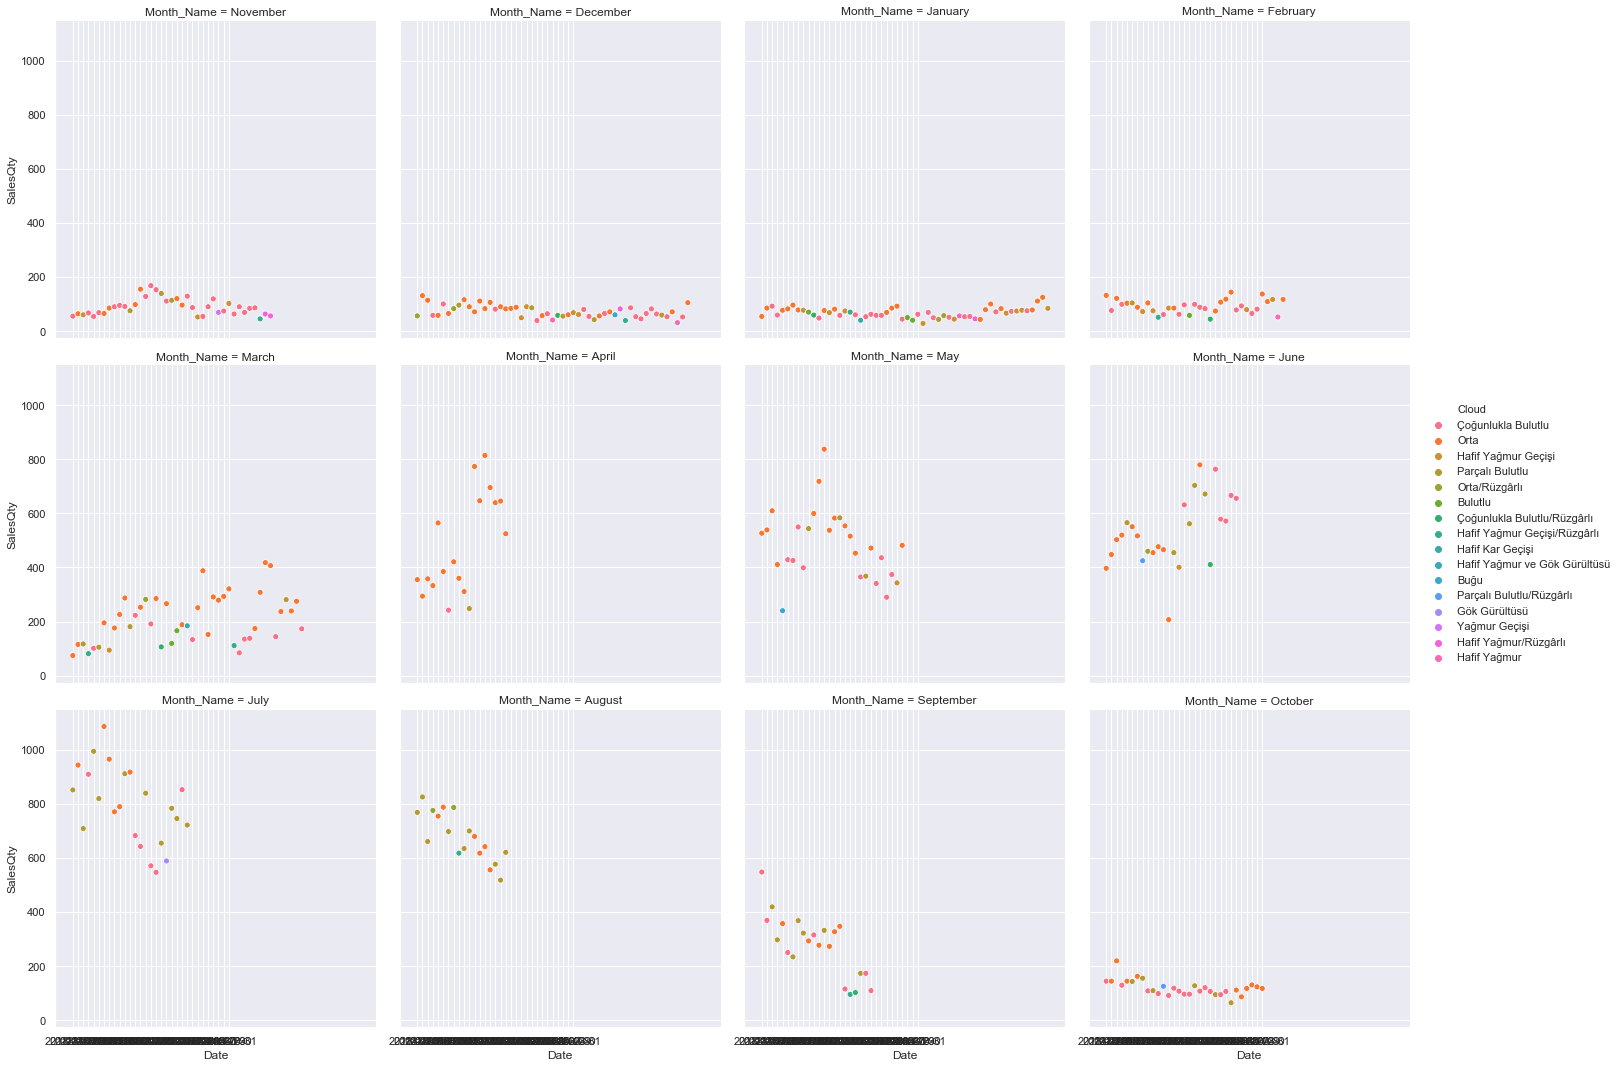

In [111]:
sns_plot = sns.relplot(x = 'Date', y = 'SalesQty', hue = 'Cloud', col ='Month_Name', col_wrap = 4, data = df_merge )


In [117]:
df_merge['Rain'] = df_merge['Cloud'].apply(lambda x: 'Clear' if (x == 'Çoğunlukla Bulutlu') else 0)
df_merge

Date  SalesQty  Revenue   AvgPrice   Day_Name Month_Name  \
0    2017-11-17        55   183.99     149.18     Friday   November   
1    2017-11-18        64   268.10     205.60   Saturday   November   
2    2017-11-20        60   232.79     168.92     Monday   November   
3    2017-11-21        67   260.12     167.84    Tuesday   November   
4    2017-11-22        54   261.33     175.54  Wednesday   November   
..          ...       ...      ...        ...        ...        ...   
437  2019-03-23       281  1405.93  100747.69   Saturday      March   
438  2019-03-23       281  1405.93  100747.69   Saturday      March   
439  2019-03-24       239  1327.81     857.99     Sunday      March   
440  2019-03-25       275  1301.52     845.17     Monday      March   
441  2019-03-27       173   992.26     658.34  Wednesday      March   

     Temperature                Cloud         Wind   Rain  
0             16   Çoğunlukla Bulutlu  KKD 16 km/s  Clear  
1             16                 Orta    B 10 km/s      0  
2              8  Hafif Yağmur Geçişi   KB 31 km/s      0  
3              8   Çoğunlukla Bulutlu  KKB 13 km/s  Clear  
4             11   Çoğunlukla Bulutlu   GB 23 km/s  Clear  
..           ...                  ...          ...    ...  
437           12      Parçalı Bulutlu    KB 3 km/s      0  
438           12      Parçalı Bulutlu    KB 3 km/s      0  
439           11                 Orta  KKD 16 km/s      0  
440           13                 Orta  BGB 16 km/s      0  
441           11   Çoğunlukla Bulutlu   KD 13 km/s  Clear  

[442 rows x 10 columns]

In [136]:
# The Rain Column
df_merge.loc[df_merge['Cloud'] == 'Çoğunlukla Bulutlu', 'Rain'] = 'Clear'
df_merge.loc[df_merge['Cloud'] == 'Orta', 'Rain'] = 'Clear'
df_merge.loc[df_merge['Cloud'] == 'Hafif Yağmur Geçişi', 'Rain'] = 'Rain'
df_merge.loc[df_merge['Cloud'] == 'Parçalı Bulutlu', 'Rain'] = 'Clear'
df_merge.loc[df_merge['Cloud'] == 'Orta/Rüzgârlı', 'Rain'] = 'Clear'
df_merge.loc[df_merge['Cloud'] == 'Bulutlu', 'Rain'] = 'Clear'
df_merge.loc[df_merge['Cloud'] == 'Çoğunlukla Bulutlu/Rüzgârlı', 'Rain'] = 'Clear'
df_merge.loc[df_merge['Cloud'] == 'Hafif Yağmur Geçişi/Rüzgârlı', 'Rain'] = 'Rain'
df_merge.loc[df_merge['Cloud'] == 'Hafif Kar Geçişi', 'Rain'] = 'Clear'
df_merge.loc[df_merge['Cloud'] == 'Hafif Yağmur ve Gök Gürültüsü', 'Rain'] = 'Rain'
df_merge.loc[df_merge['Cloud'] == 'Buğu', 'Rain'] = 'Clear'
df_merge.loc[df_merge['Cloud'] == 'Parçalı Bulutlu/Rüzgârlı', 'Rain'] = 'Clear'
df_merge.loc[df_merge['Cloud'] == 'Gök Gürültüsü', 'Rain'] = 'Clear'
df_merge.loc[df_merge['Cloud'] == 'Yağmur Geçişi', 'Rain'] = 'Rain'
df_merge.loc[df_merge['Cloud'] == 'Hafif Yağmur/Rüzgârlı', 'Rain'] = 'Rain'
df_merge.loc[df_merge['Cloud'] == 'Hafif Yağmur', 'Rain'] = 'Rain'

df_merge

Date  SalesQty  Revenue   AvgPrice   Day_Name Month_Name  \
0    2017-11-17        55   183.99     149.18     Friday   November   
1    2017-11-18        64   268.10     205.60   Saturday   November   
2    2017-11-20        60   232.79     168.92     Monday   November   
3    2017-11-21        67   260.12     167.84    Tuesday   November   
4    2017-11-22        54   261.33     175.54  Wednesday   November   
..          ...       ...      ...        ...        ...        ...   
437  2019-03-23       281  1405.93  100747.69   Saturday      March   
438  2019-03-23       281  1405.93  100747.69   Saturday      March   
439  2019-03-24       239  1327.81     857.99     Sunday      March   
440  2019-03-25       275  1301.52     845.17     Monday      March   
441  2019-03-27       173   992.26     658.34  Wednesday      March   

     Temperature                Cloud         Wind   Rain  
0             16   Çoğunlukla Bulutlu  KKD 16 km/s  Clear  
1             16                 Orta    B 10 km/s  Clear  
2              8  Hafif Yağmur Geçişi   KB 31 km/s   Rain  
3              8   Çoğunlukla Bulutlu  KKB 13 km/s  Clear  
4             11   Çoğunlukla Bulutlu   GB 23 km/s  Clear  
..           ...                  ...          ...    ...  
437           12      Parçalı Bulutlu    KB 3 km/s  Clear  
438           12      Parçalı Bulutlu    KB 3 km/s  Clear  
439           11                 Orta  KKD 16 km/s  Clear  
440           13                 Orta  BGB 16 km/s  Clear  
441           11   Çoğunlukla Bulutlu   KD 13 km/s  Clear  

[442 rows x 10 columns]

In [137]:
df_merge.Rain.value_counts()

Clear    394
Rain      48
Name: Rain, dtype: int64

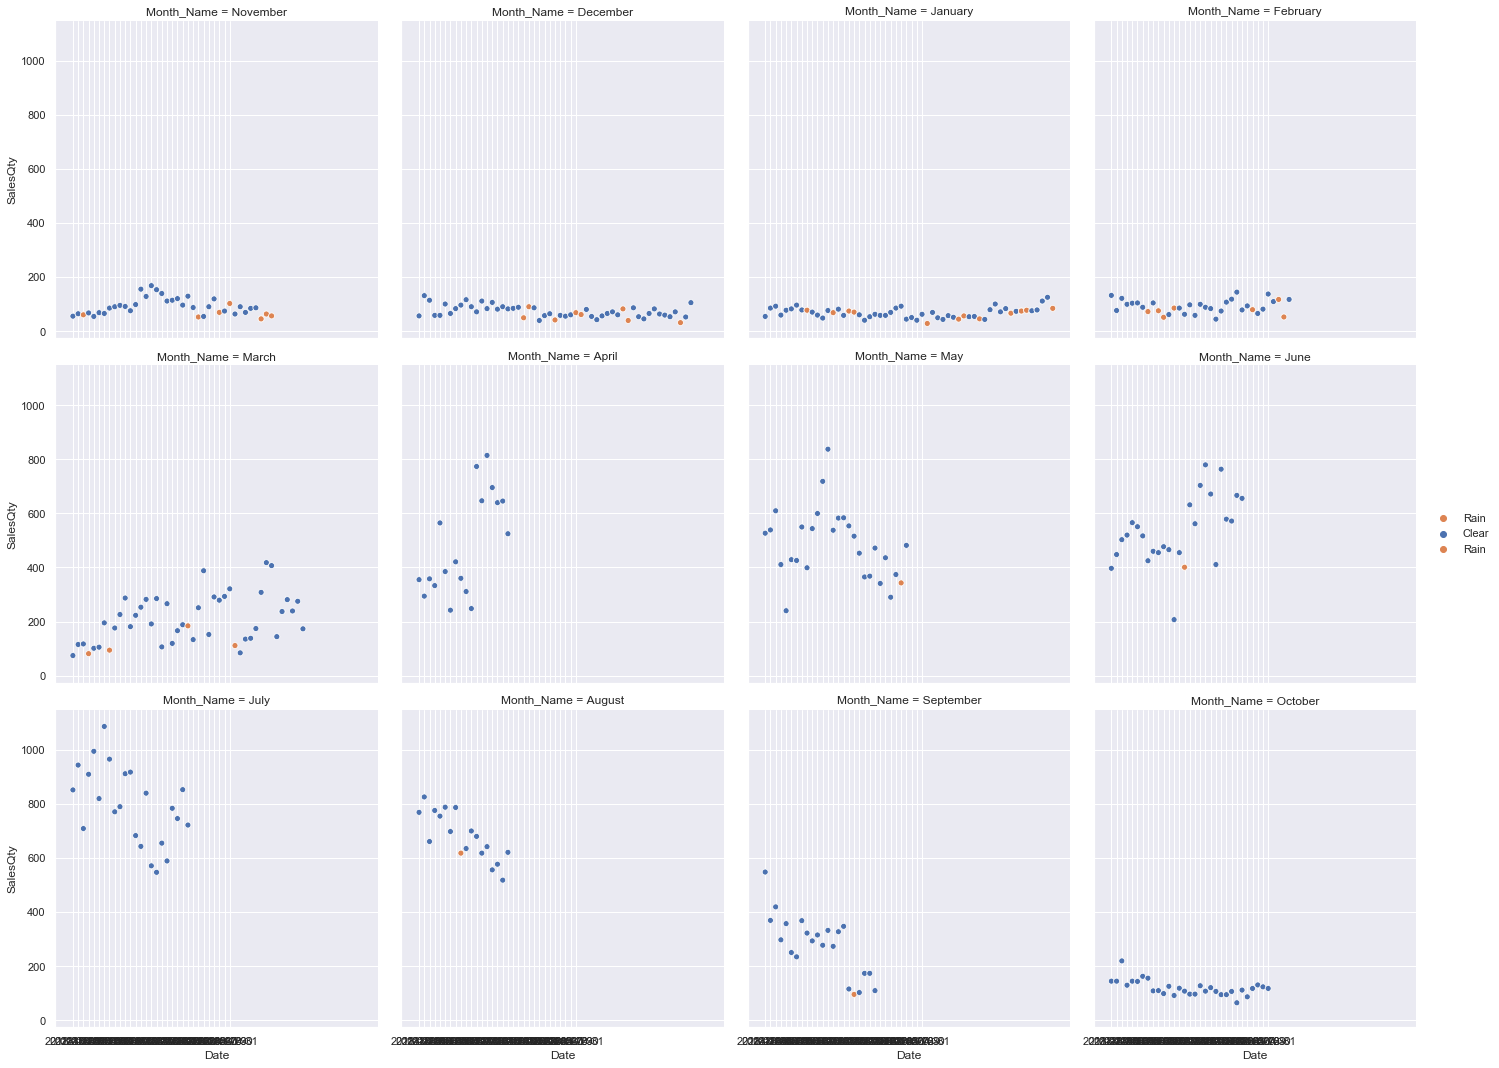

In [138]:
sns_plot = sns.relplot(x = 'Date', y = 'SalesQty', hue = 'Rain', col ='Month_Name', col_wrap = 4, data = df_merge )


In [139]:
# The Snow Column
df_merge.loc[df_merge['Cloud'] == 'Çoğunlukla Bulutlu', 'Snow'] = 'Clear'
df_merge.loc[df_merge['Cloud'] == 'Orta', 'Snow'] = 'Clear'
df_merge.loc[df_merge['Cloud'] == 'Hafif Yağmur Geçişi', 'Snow'] = 'Clear'
df_merge.loc[df_merge['Cloud'] == 'Parçalı Bulutlu', 'Snow'] = 'Clear'
df_merge.loc[df_merge['Cloud'] == 'Orta/Rüzgârlı', 'Snow'] = 'Clear'
df_merge.loc[df_merge['Cloud'] == 'Bulutlu', 'Snow'] = 'Clear'
df_merge.loc[df_merge['Cloud'] == 'Çoğunlukla Bulutlu/Rüzgârlı', 'Snow'] = 'Clear'
df_merge.loc[df_merge['Cloud'] == 'Hafif Yağmur Geçişi/Rüzgârlı', 'Snow'] = 'Clear'
df_merge.loc[df_merge['Cloud'] == 'Hafif Kar Geçişi', 'Snow'] = 'Snow'
df_merge.loc[df_merge['Cloud'] == 'Hafif Yağmur ve Gök Gürültüsü', 'Snow'] = 'Clear'
df_merge.loc[df_merge['Cloud'] == 'Buğu', 'Snow'] = 'Clear'
df_merge.loc[df_merge['Cloud'] == 'Parçalı Bulutlu/Rüzgârlı', 'Snow'] = 'Clear'
df_merge.loc[df_merge['Cloud'] == 'Gök Gürültüsü', 'Snow'] = 'Clear'
df_merge.loc[df_merge['Cloud'] == 'Yağmur Geçişi', 'Snow'] = 'Clear'
df_merge.loc[df_merge['Cloud'] == 'Hafif Yağmur/Rüzgârlı', 'Snow'] = 'Clear'
df_merge.loc[df_merge['Cloud'] == 'Hafif Yağmur', 'Snow'] = 'Clear'

df_merge

Date  SalesQty  Revenue   AvgPrice   Day_Name Month_Name  \
0    2017-11-17        55   183.99     149.18     Friday   November   
1    2017-11-18        64   268.10     205.60   Saturday   November   
2    2017-11-20        60   232.79     168.92     Monday   November   
3    2017-11-21        67   260.12     167.84    Tuesday   November   
4    2017-11-22        54   261.33     175.54  Wednesday   November   
..          ...       ...      ...        ...        ...        ...   
437  2019-03-23       281  1405.93  100747.69   Saturday      March   
438  2019-03-23       281  1405.93  100747.69   Saturday      March   
439  2019-03-24       239  1327.81     857.99     Sunday      March   
440  2019-03-25       275  1301.52     845.17     Monday      March   
441  2019-03-27       173   992.26     658.34  Wednesday      March   

     Temperature                Cloud         Wind   Rain   Snow  
0             16   Çoğunlukla Bulutlu  KKD 16 km/s  Clear  Clear  
1             16                 Orta    B 10 km/s  Clear  Clear  
2              8  Hafif Yağmur Geçişi   KB 31 km/s   Rain  Clear  
3              8   Çoğunlukla Bulutlu  KKB 13 km/s  Clear  Clear  
4             11   Çoğunlukla Bulutlu   GB 23 km/s  Clear  Clear  
..           ...                  ...          ...    ...    ...  
437           12      Parçalı Bulutlu    KB 3 km/s  Clear  Clear  
438           12      Parçalı Bulutlu    KB 3 km/s  Clear  Clear  
439           11                 Orta  KKD 16 km/s  Clear  Clear  
440           13                 Orta  BGB 16 km/s  Clear  Clear  
441           11   Çoğunlukla Bulutlu   KD 13 km/s  Clear  Clear  

[442 rows x 11 columns]

In [140]:
df_merge.Snow.value_counts()

Clear    441
Snow       1
Name: Snow, dtype: int64

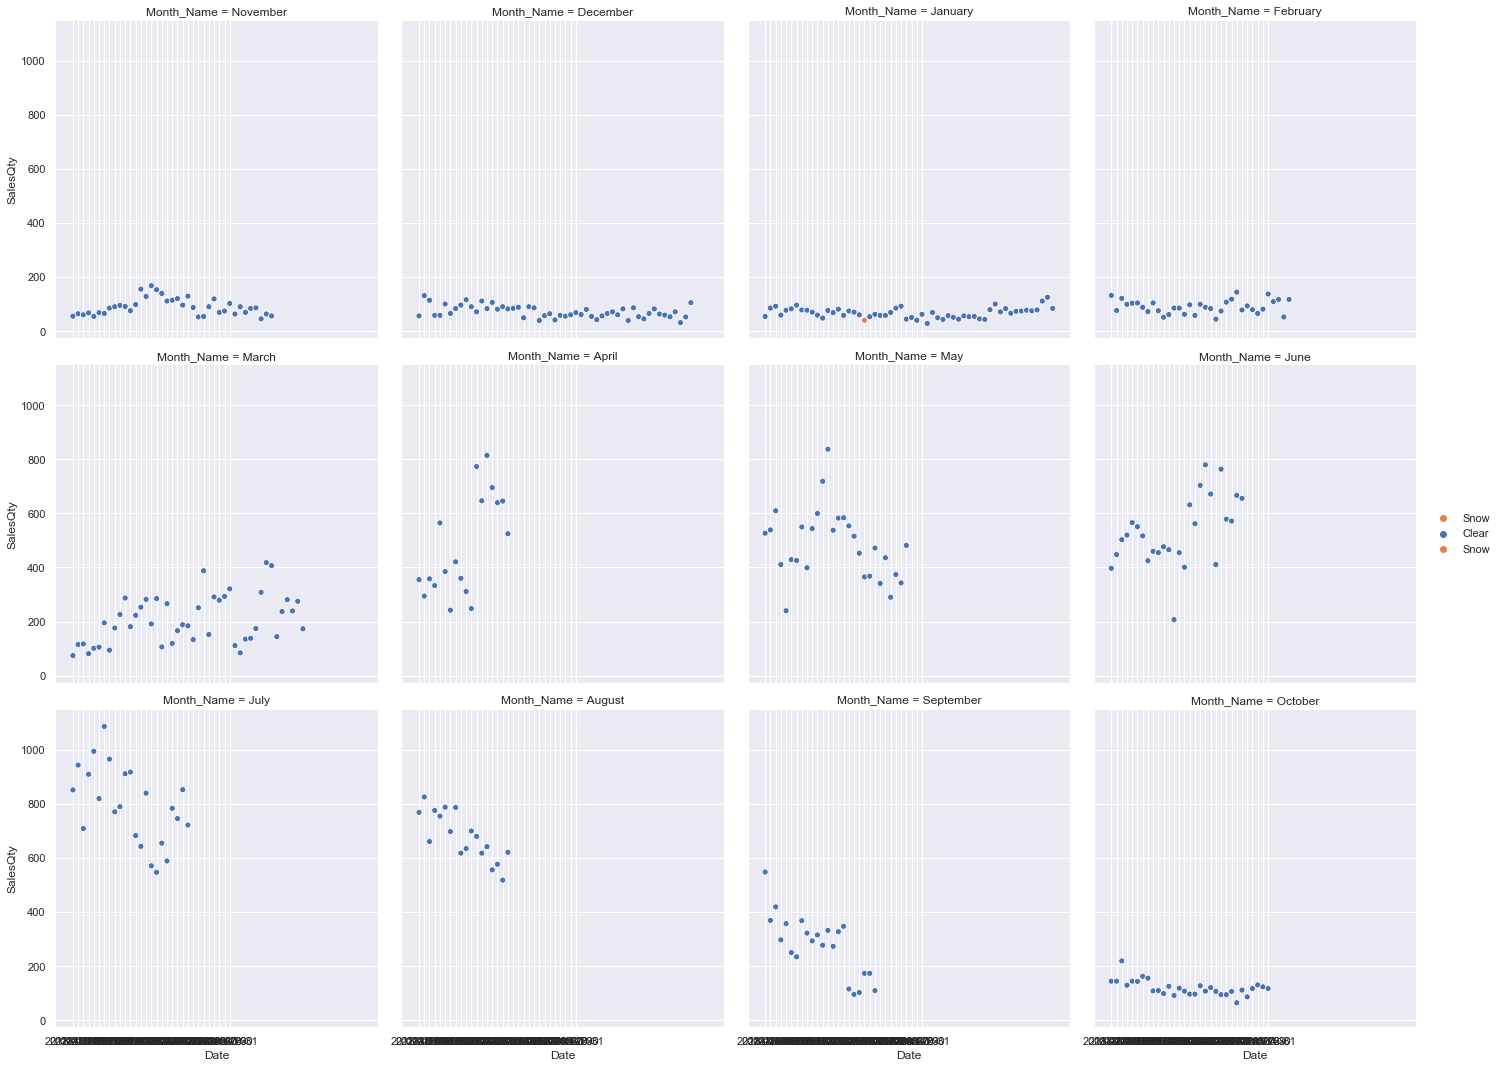

In [141]:
sns_plot = sns.relplot(x = 'Date', y = 'SalesQty', hue = 'Snow', col ='Month_Name', col_wrap = 4, data = df_merge )


In [142]:
# The Wind Column
df_merge.loc[df_merge['Cloud'] == 'Çoğunlukla Bulutlu', 'Wind'] = 'Weak'
df_merge.loc[df_merge['Cloud'] == 'Orta', 'Wind'] = 'Weak'
df_merge.loc[df_merge['Cloud'] == 'Hafif Yağmur Geçişi', 'Wind'] = 'Weak'
df_merge.loc[df_merge['Cloud'] == 'Parçalı Bulutlu', 'Wind'] = 'Weak'
df_merge.loc[df_merge['Cloud'] == 'Orta/Rüzgârlı', 'Wind'] = 'Strong'
df_merge.loc[df_merge['Cloud'] == 'Bulutlu', 'Wind'] = 'Weak'
df_merge.loc[df_merge['Cloud'] == 'Çoğunlukla Bulutlu/Rüzgârlı', 'Wind'] = 'Strong'
df_merge.loc[df_merge['Cloud'] == 'Hafif Yağmur Geçişi/Rüzgârlı', 'Wind'] = 'Strong'
df_merge.loc[df_merge['Cloud'] == 'Hafif Kar Geçişi', 'Wind'] = 'Weak'
df_merge.loc[df_merge['Cloud'] == 'Hafif Yağmur ve Gök Gürültüsü', 'Wind'] = 'Strong'
df_merge.loc[df_merge['Cloud'] == 'Buğu', 'Wind'] = 'Weak'
df_merge.loc[df_merge['Cloud'] == 'Parçalı Bulutlu/Rüzgârlı', 'Wind'] = 'Strong'
df_merge.loc[df_merge['Cloud'] == 'Gök Gürültüsü', 'Wind'] = 'Strong'
df_merge.loc[df_merge['Cloud'] == 'Yağmur Geçişi', 'Wind'] = 'Weak'
df_merge.loc[df_merge['Cloud'] == 'Hafif Yağmur/Rüzgârlı', 'Wind'] = 'Strong'
df_merge.loc[df_merge['Cloud'] == 'Hafif Yağmur', 'Wind'] = 'Weak'

df_merge

Date  SalesQty  Revenue   AvgPrice   Day_Name Month_Name  \
0    2017-11-17        55   183.99     149.18     Friday   November   
1    2017-11-18        64   268.10     205.60   Saturday   November   
2    2017-11-20        60   232.79     168.92     Monday   November   
3    2017-11-21        67   260.12     167.84    Tuesday   November   
4    2017-11-22        54   261.33     175.54  Wednesday   November   
..          ...       ...      ...        ...        ...        ...   
437  2019-03-23       281  1405.93  100747.69   Saturday      March   
438  2019-03-23       281  1405.93  100747.69   Saturday      March   
439  2019-03-24       239  1327.81     857.99     Sunday      March   
440  2019-03-25       275  1301.52     845.17     Monday      March   
441  2019-03-27       173   992.26     658.34  Wednesday      March   

     Temperature                Cloud  Wind   Rain   Snow  
0             16   Çoğunlukla Bulutlu  Weak  Clear  Clear  
1             16                 Orta  Weak  Clear  Clear  
2              8  Hafif Yağmur Geçişi  Weak   Rain  Clear  
3              8   Çoğunlukla Bulutlu  Weak  Clear  Clear  
4             11   Çoğunlukla Bulutlu  Weak  Clear  Clear  
..           ...                  ...   ...    ...    ...  
437           12      Parçalı Bulutlu  Weak  Clear  Clear  
438           12      Parçalı Bulutlu  Weak  Clear  Clear  
439           11                 Orta  Weak  Clear  Clear  
440           13                 Orta  Weak  Clear  Clear  
441           11   Çoğunlukla Bulutlu  Weak  Clear  Clear  

[442 rows x 11 columns]

In [143]:
df_merge.Wind.value_counts()

Weak      408
Strong     34
Name: Wind, dtype: int64

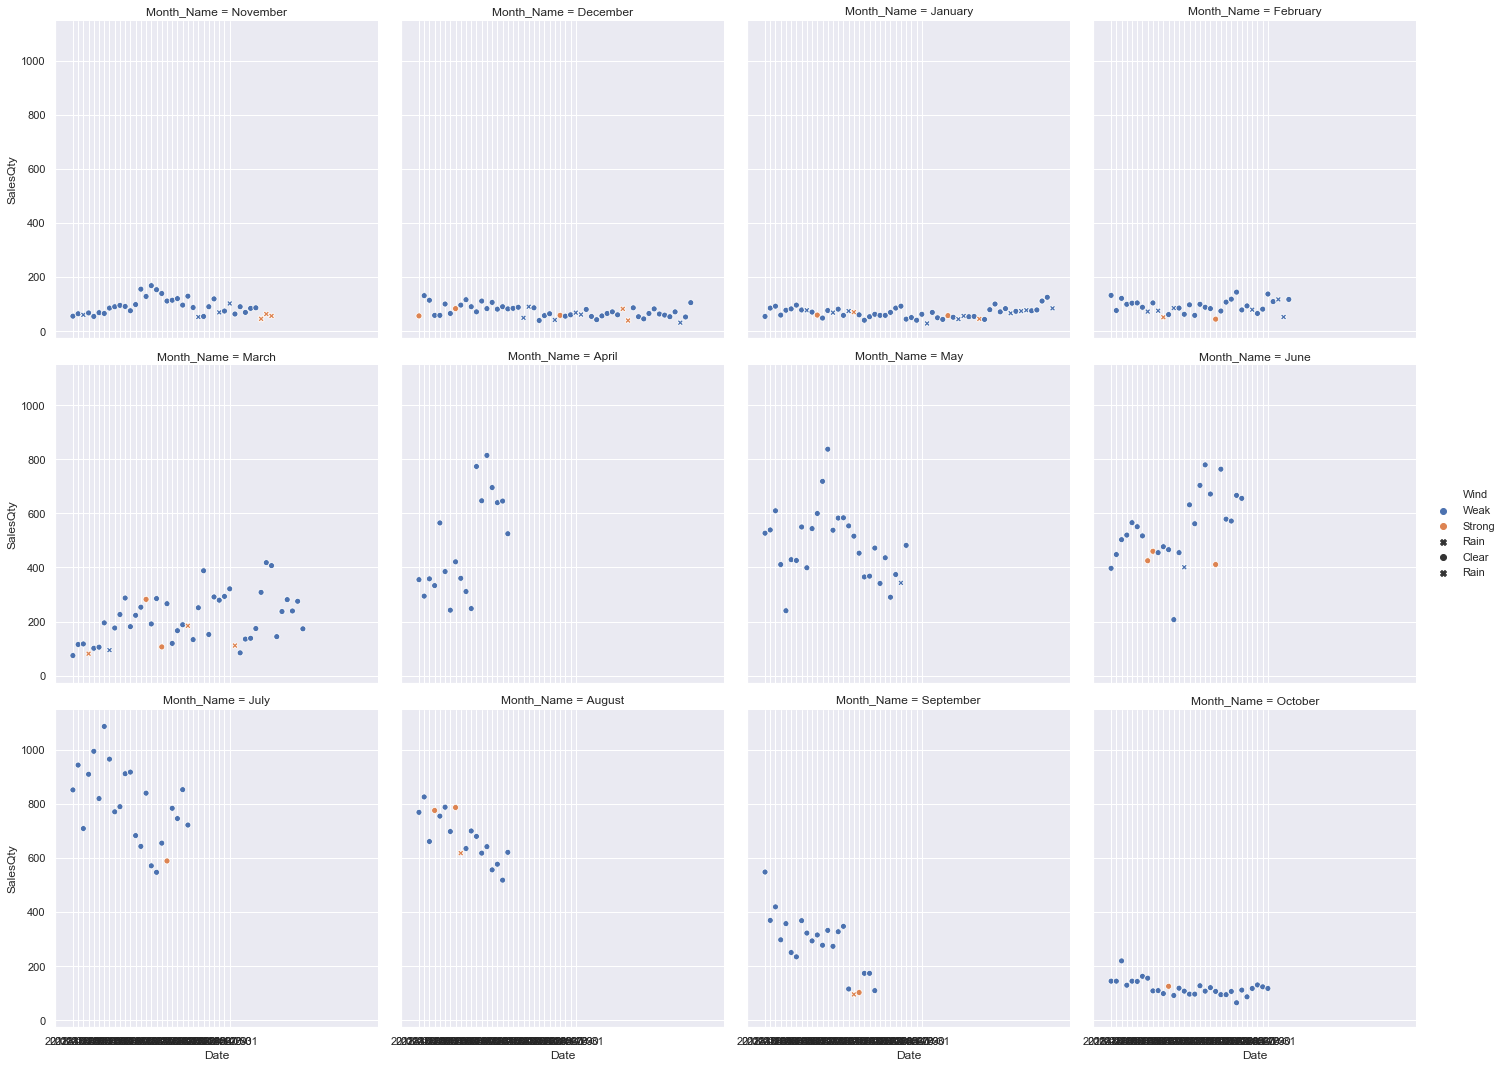

In [145]:
sns_plot = sns.relplot(x = 'Date', y = 'SalesQty', hue = 'Wind', style = 'Rain', col ='Month_Name', col_wrap = 4, data = df_merge )


In [146]:
# The Cloudness Column
df_merge.loc[df_merge['Cloud'] == 'Çoğunlukla Bulutlu', 'Cloudness'] = 'Heavy'
df_merge.loc[df_merge['Cloud'] == 'Orta', 'Cloudness'] = 'Partial'
df_merge.loc[df_merge['Cloud'] == 'Hafif Yağmur Geçişi', 'Cloudness'] = 'Heavy'
df_merge.loc[df_merge['Cloud'] == 'Parçalı Bulutlu', 'Cloudness'] = 'Partial'
df_merge.loc[df_merge['Cloud'] == 'Orta/Rüzgârlı', 'Cloudness'] = 'Partial'
df_merge.loc[df_merge['Cloud'] == 'Bulutlu', 'Cloudness'] = 'Heavy'
df_merge.loc[df_merge['Cloud'] == 'Çoğunlukla Bulutlu/Rüzgârlı', 'Cloudness'] = 'Heavy'
df_merge.loc[df_merge['Cloud'] == 'Hafif Yağmur Geçişi/Rüzgârlı', 'Cloudness'] = 'Heavy'
df_merge.loc[df_merge['Cloud'] == 'Hafif Kar Geçişi', 'Cloudness'] = 'Heavy'
df_merge.loc[df_merge['Cloud'] == 'Hafif Yağmur ve Gök Gürültüsü', 'Cloudness'] = 'Heavy'
df_merge.loc[df_merge['Cloud'] == 'Buğu', 'Cloudness'] = 'Partial'
df_merge.loc[df_merge['Cloud'] == 'Parçalı Bulutlu/Rüzgârlı', 'Cloudness'] = 'Partial'
df_merge.loc[df_merge['Cloud'] == 'Gök Gürültüsü', 'Cloudness'] = 'Heavy'
df_merge.loc[df_merge['Cloud'] == 'Yağmur Geçişi', 'Cloudness'] = 'Heavy'
df_merge.loc[df_merge['Cloud'] == 'Hafif Yağmur/Rüzgârlı', 'Cloudness'] = 'Heavy'
df_merge.loc[df_merge['Cloud'] == 'Hafif Yağmur', 'Cloudness'] = 'Heavy'

df_merge

Date  SalesQty  Revenue   AvgPrice   Day_Name Month_Name  \
0    2017-11-17        55   183.99     149.18     Friday   November   
1    2017-11-18        64   268.10     205.60   Saturday   November   
2    2017-11-20        60   232.79     168.92     Monday   November   
3    2017-11-21        67   260.12     167.84    Tuesday   November   
4    2017-11-22        54   261.33     175.54  Wednesday   November   
..          ...       ...      ...        ...        ...        ...   
437  2019-03-23       281  1405.93  100747.69   Saturday      March   
438  2019-03-23       281  1405.93  100747.69   Saturday      March   
439  2019-03-24       239  1327.81     857.99     Sunday      March   
440  2019-03-25       275  1301.52     845.17     Monday      March   
441  2019-03-27       173   992.26     658.34  Wednesday      March   

     Temperature                Cloud  Wind   Rain   Snow Cloudness  
0             16   Çoğunlukla Bulutlu  Weak  Clear  Clear     Heavy  
1             16                 Orta  Weak  Clear  Clear   Partial  
2              8  Hafif Yağmur Geçişi  Weak   Rain  Clear     Heavy  
3              8   Çoğunlukla Bulutlu  Weak  Clear  Clear     Heavy  
4             11   Çoğunlukla Bulutlu  Weak  Clear  Clear     Heavy  
..           ...                  ...   ...    ...    ...       ...  
437           12      Parçalı Bulutlu  Weak  Clear  Clear   Partial  
438           12      Parçalı Bulutlu  Weak  Clear  Clear   Partial  
439           11                 Orta  Weak  Clear  Clear   Partial  
440           13                 Orta  Weak  Clear  Clear   Partial  
441           11   Çoğunlukla Bulutlu  Weak  Clear  Clear     Heavy  

[442 rows x 12 columns]

In [147]:
df_merge.Cloudness.value_counts()

Partial    248
Heavy      194
Name: Cloudness, dtype: int64

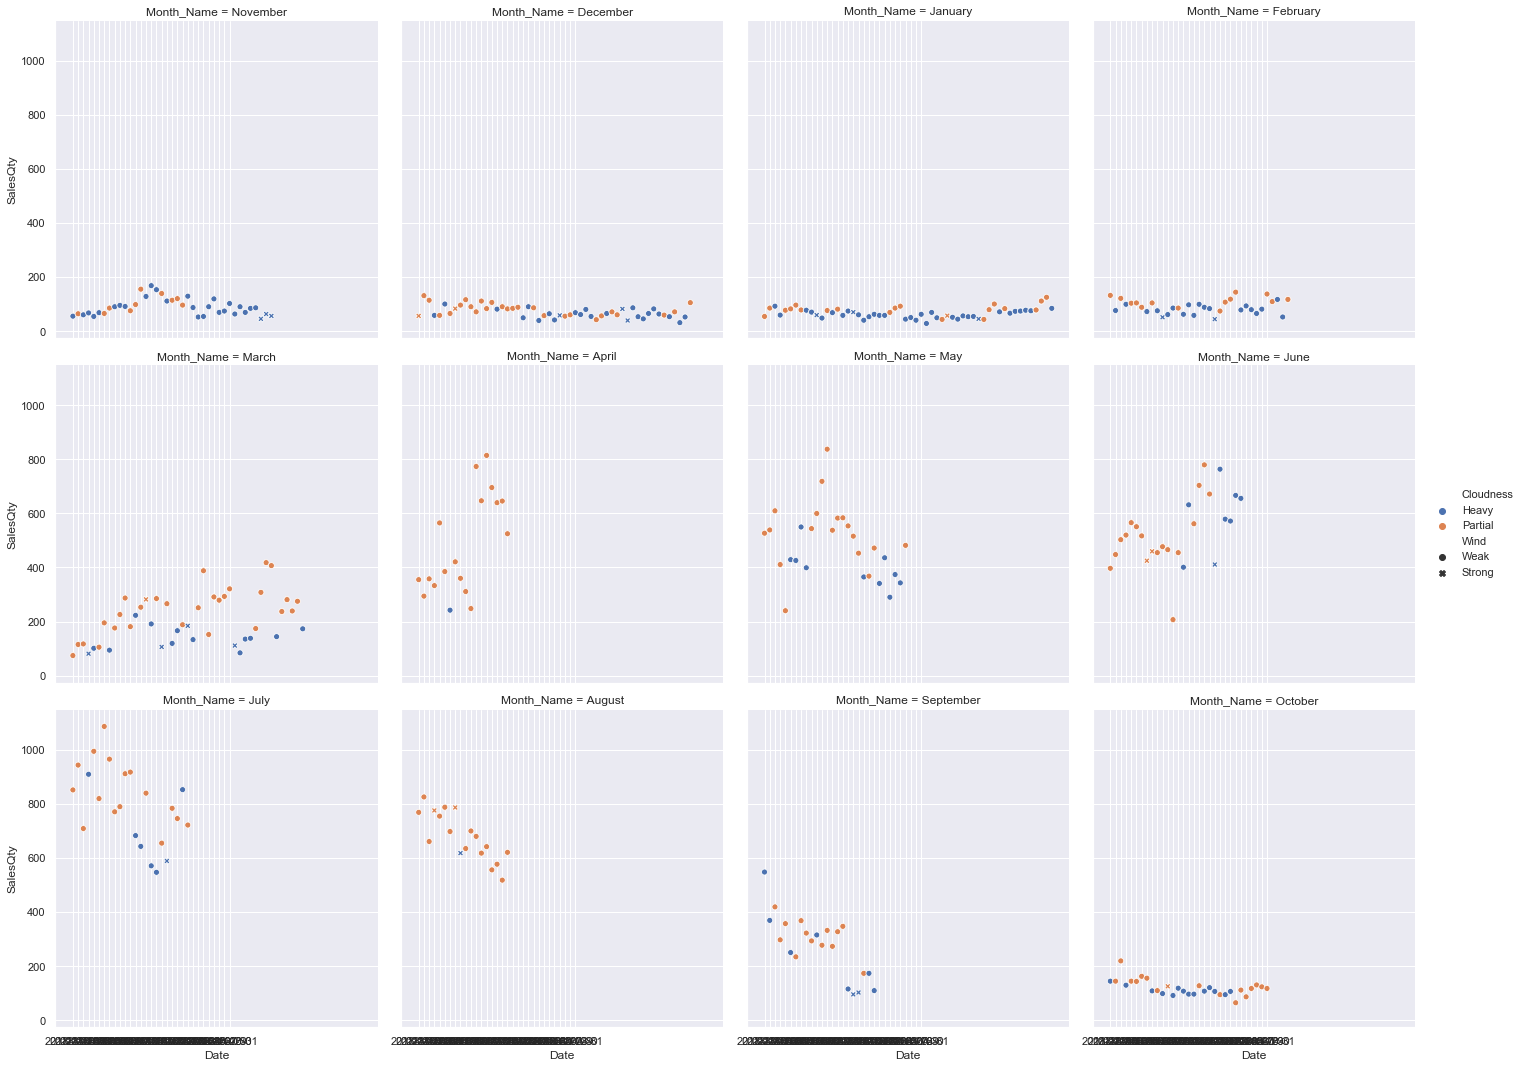

In [149]:
sns_plot = sns.relplot(x = 'Date', y = 'SalesQty', hue = 'Cloudness', style = 'Wind', col ='Month_Name', col_wrap = 4, data = df_merge )

In [151]:
df_merge.Temperature.describe()

count    442.000000
mean      16.158371
std        7.626026
min        0.000000
25%       11.000000
50%       16.000000
75%       22.000000
max       32.000000
Name: Temperature, dtype: float64

In [186]:
# The Temp Column
df_merge.loc[df_merge['Temperature'] < 9, 'Temp'] = 'Freezing'
df_merge.loc[(df_merge['Temperature'] >= 9) & (df_merge['Temperature'] < 13), 'Temp'] = 'Cold'
df_merge.loc[(df_merge['Temperature'] >= 13) & (df_merge['Temperature'] < 17), 'Temp'] = 'Cool'
df_merge.loc[(df_merge['Temperature'] >= 17) & (df_merge['Temperature'] < 24), 'Temp'] = 'Normal'
df_merge.loc[(df_merge['Temperature'] >= 24) & (df_merge['Temperature'] < 28), 'Temp'] = 'Hot'
df_merge.loc[df_merge['Temperature'] >= 29 , 'Temp'] = 'Too Hot'

df_merge

Date  SalesQty  Revenue   AvgPrice   Day_Name Month_Name  \
0    2017-11-17        55   183.99     149.18     Friday   November   
1    2017-11-18        64   268.10     205.60   Saturday   November   
2    2017-11-20        60   232.79     168.92     Monday   November   
3    2017-11-21        67   260.12     167.84    Tuesday   November   
4    2017-11-22        54   261.33     175.54  Wednesday   November   
..          ...       ...      ...        ...        ...        ...   
437  2019-03-23       281  1405.93  100747.69   Saturday      March   
438  2019-03-23       281  1405.93  100747.69   Saturday      March   
439  2019-03-24       239  1327.81     857.99     Sunday      March   
440  2019-03-25       275  1301.52     845.17     Monday      March   
441  2019-03-27       173   992.26     658.34  Wednesday      March   

     Temperature                Cloud  Wind   Rain   Snow Cloudness      Temp  
0             16   Çoğunlukla Bulutlu  Weak  Clear  Clear     Heavy      Cool  
1             16                 Orta  Weak  Clear  Clear   Partial      Cool  
2              8  Hafif Yağmur Geçişi  Weak   Rain  Clear     Heavy  Freezing  
3              8   Çoğunlukla Bulutlu  Weak  Clear  Clear     Heavy  Freezing  
4             11   Çoğunlukla Bulutlu  Weak  Clear  Clear     Heavy      Cold  
..           ...                  ...   ...    ...    ...       ...       ...  
437           12      Parçalı Bulutlu  Weak  Clear  Clear   Partial      Cold  
438           12      Parçalı Bulutlu  Weak  Clear  Clear   Partial      Cold  
439           11                 Orta  Weak  Clear  Clear   Partial      Cold  
440           13                 Orta  Weak  Clear  Clear   Partial      Cool  
441           11   Çoğunlukla Bulutlu  Weak  Clear  Clear     Heavy      Cold  

[442 rows x 13 columns]

In [187]:
df_merge.Temp.value_counts()

Normal      111
Cold         86
Freezing     80
Cool         72
Hot          60
Too Hot      33
Name: Temp, dtype: int64

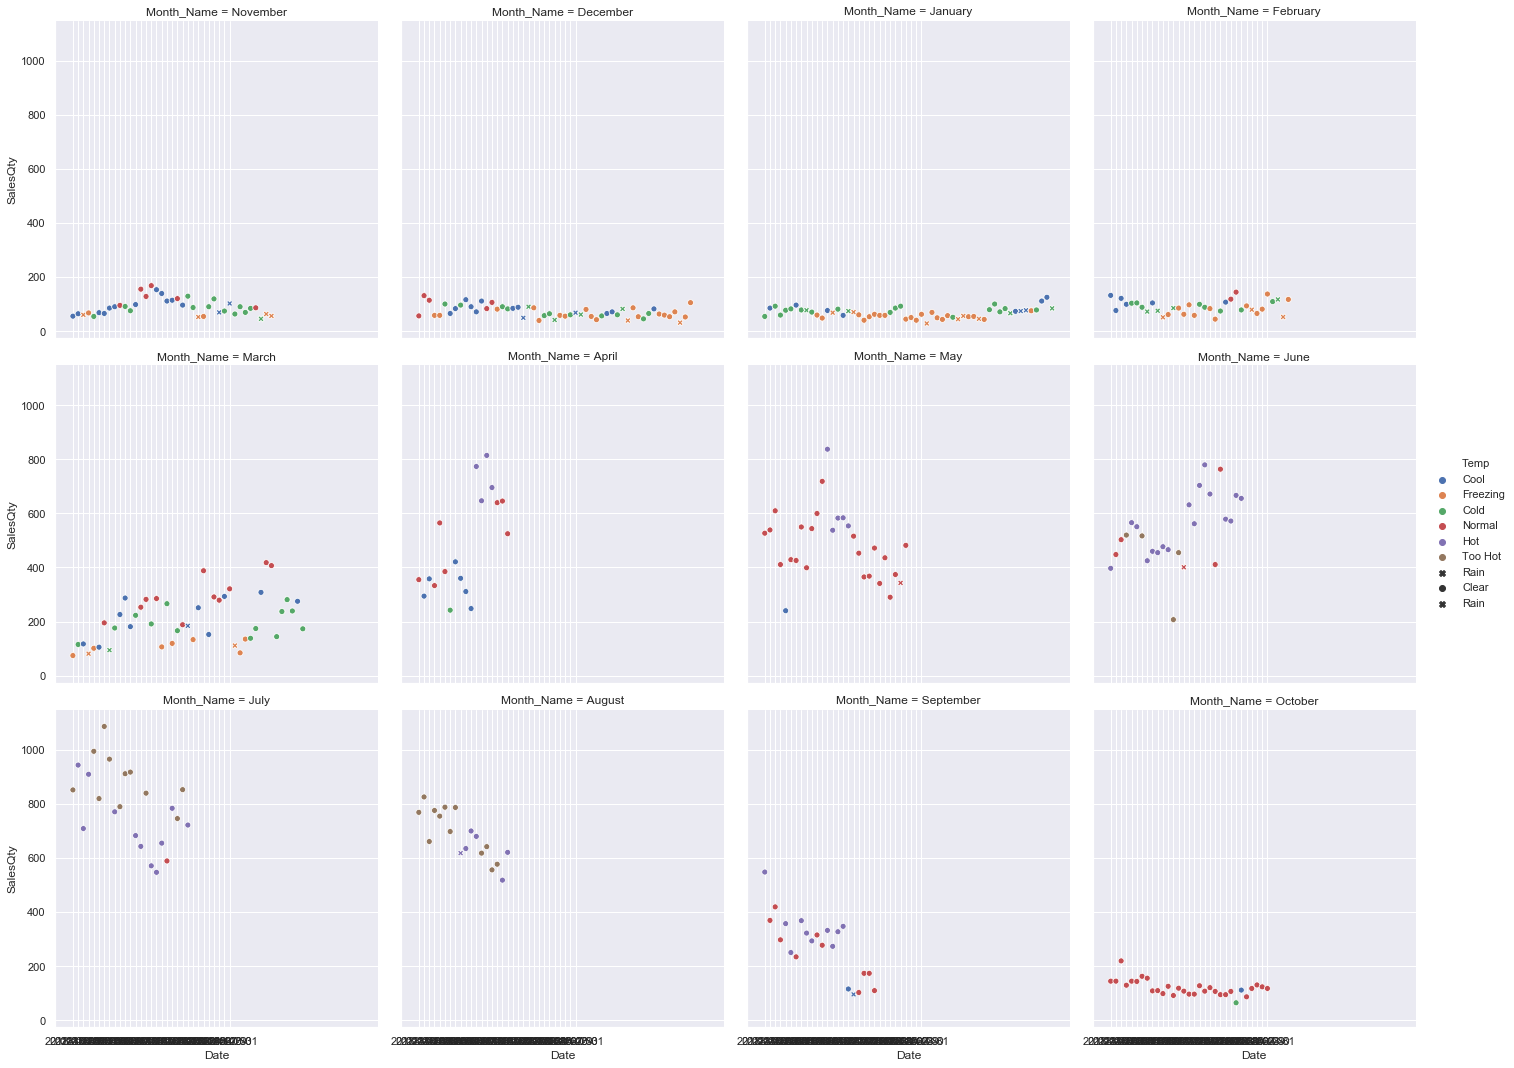

In [189]:
sns_plot = sns.relplot(x = 'Date', y = 'SalesQty', hue = 'Temp', style = 'Rain', col ='Month_Name', col_wrap = 4, data = df_merge )
sns_plot.savefig("/Users/alperoner/Desktop/workspace/arctic/data/cubuk_temp_rain.png", dpi=600)

In [206]:
# Implementation of Central Limit Theorem
population_size = 100
#Define defaultdict or regular
describe_dict = defaultdict(list)
#describe_dict = {'mean':[], 'var':[]}
column = 'Month_Name'
condition = 'March'
df_a = pd.DataFrame()
df_b = pd.DataFrame()

for i in range(population_size):
    #clear past samples
    df_a.empty
    df_b.empty
    # sample data for a condition 
    df_a = df_merge.loc[df_merge[column] == condition]
    sample_size = 20
    random_list = []
    for j in range(sample_size):
        random_list.append(random.randint(0, df_a.shape[0]-1))
    df_b = df_a.iloc[random_list]
    describe_dict['mean'].append(df_b['SalesQty'].mean())
    describe_dict['var'].append(df_b['SalesQty'].std())

In [207]:
describe_dict['population_mean'] = statistics.mean(describe_dict['mean']) 
describe_dict['population_var'] = statistics.variance(describe_dict['mean']) / math.sqrt(population_size)
describe_dict

defaultdict(list,
            {'mean': [218.65,
              195.25,
              197.85,
              222.8,
              210.95,
              232.2,
              221.8,
              210.85,
              194.25,
              199.65,
              208.45,
              223.3,
              253.3,
              215.8,
              163.3,
              224.85,
              225.0,
              242.8,
              183.9,
              203.3,
              210.45,
              182.2,
              193.35,
              192.5,
              229.55,
              237.35,
              219.8,
              212.0,
              212.7,
              221.35,
              215.35,
              223.25,
              186.15,
              222.95,
              212.5,
              197.8,
              229.05,
              213.0,
              211.05,
              233.6,
              204.15,
              171.6,
              220.25,
              231.4,
              226.85,
      

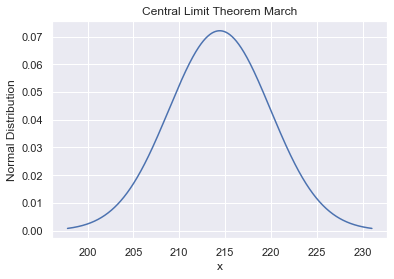

In [208]:
mu = describe_dict['population_mean']
variance = describe_dict['population_var']
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title('Central Limit Theorem ' + condition )
plt.xlabel('x')
plt.ylabel('Normal Distribution')
plt.show()

In [214]:
# Implementation of Central Limit Theorem for all Uskudar
population_size = 100
#Define defaultdict or regular
describe_dict = defaultdict(list)
#describe_dict = {'mean':[], 'var':[]}
column_1 = 'Month_Name'
column_2 = 'Temp'
condition_1 = 'March'
condition_2 = 'Freezing'


for i in range(population_size):
    #clear past samples
    df_a.empty
    df_b.empty
    # sample data for a condition 
    df_a = df_merge.loc[(df_merge[column_1] == condition_1) & (df_merge[column_2]  == condition_2 )]
    sample_size = 10
    random_list = []
    for j in range(sample_size):
        random_list.append(random.randint(0, df_a.shape[0]-1))
    df_b = df_a.iloc[random_list]
    describe_dict['mean'].append(df_b['SalesQty'].mean())
    describe_dict['var'].append(df_b['SalesQty'].std())

describe_dict['population_mean'] = statistics.mean(describe_dict['mean']) 
describe_dict['population_var'] = statistics.variance(describe_dict['mean']) / math.sqrt(population_size)
describe_dict

defaultdict(list,
            {'mean': [103.3,
              98.1,
              103.4,
              115.4,
              101.2,
              98.6,
              118.7,
              99.9,
              110.5,
              109.8,
              111.3,
              106.1,
              108.1,
              89.1,
              108.3,
              107.8,
              108.5,
              94.0,
              115.9,
              98.2,
              111.1,
              102.2,
              102.6,
              103.2,
              92.2,
              102.2,
              104.4,
              106.0,
              105.6,
              108.2,
              104.5,
              101.1,
              111.6,
              100.8,
              106.8,
              107.1,
              95.8,
              101.0,
              107.2,
              100.6,
              110.1,
              101.0,
              106.4,
              96.1,
              104.8,
              101.4,
              105

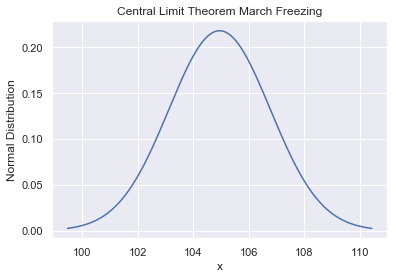

In [218]:
mu_2 = describe_dict['population_mean']
variance_2 = describe_dict['population_var']
sigma = math.sqrt(variance_2)
x = np.linspace(mu_2 - 3*sigma, mu_2 + 3*sigma, 1000)
plt.plot(x, stats.norm.pdf(x, mu_2, sigma))
plt.title('Central Limit Theorem ' + condition_1 + ' ' + condition_2)
plt.xlabel('x')
plt.ylabel('Normal Distribution')
plt.show()

In [205]:
#the difference between two probability distributions
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

/Users/alperoner/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/alperoner/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


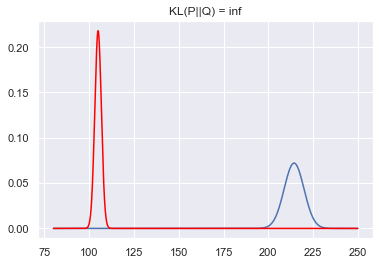

In [224]:
x = np.arange(80, 250, 0.001)
p = stats.norm.pdf(x, mu, math.sqrt(variance))
q = stats.norm.pdf(x, mu_2, math.sqrt(variance_2))
plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x, p)
plt.plot(x, q, c='red')